In [1]:
pip install decorator==5.0.9


Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import networkx as nx

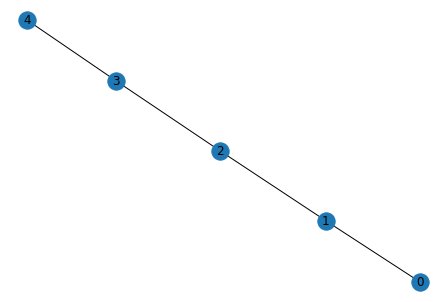

In [3]:
G=nx.path_graph(5)
nx.draw(G,with_labels=True)
plt.show()

The above graph is a path graph which has 5 nodes and 4 edges and is non-directed since there are no arrows which means this graph is not cyclic for any nodes either.

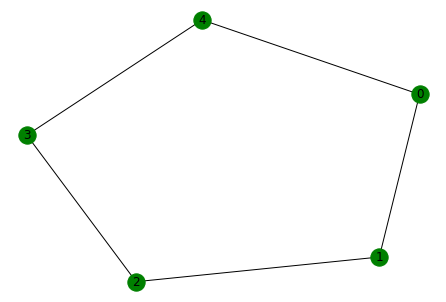

In [4]:
G = nx.cycle_graph(5)
nx.draw(G, node_color='green', with_labels=True)
plt.show()

The above graph is a cycle graph which has 5 nodes and 5 edges. It is non-directed since there are no arrows and is cyclic.

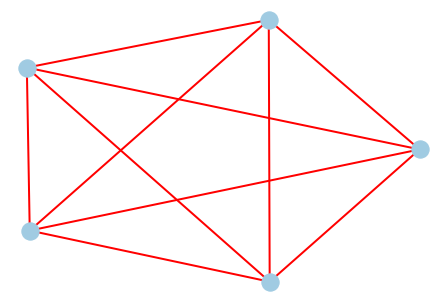

In [5]:
G = nx.complete_graph(5)
nx.draw(G, node_color='#A0CBE2', edge_color='red', width=2,
with_labels=False)
plt.show()

The above graph has 5 nodes and has 10 edges. It is non directed since there are no arrows and is a complete graph

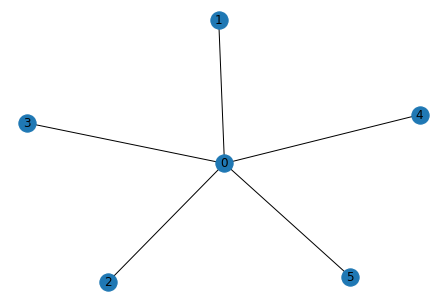

In [6]:
G = nx.star_graph(5)
pos=nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

The above graph is a star graph with 6 nodes and 5 edges. It is non directed since there are no arrows 

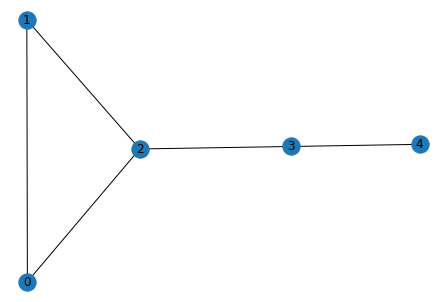

In [7]:
G = nx.lollipop_graph(3,2)
nx.draw(G, with_labels=True)
plt.show()

In [8]:
list(nx.connected_components(G))

[{0, 1, 2, 3, 4}]

In [9]:
nx.clustering(G)

{0: 1.0, 1: 1.0, 2: 0.3333333333333333, 3: 0, 4: 0}

There is 1 connected component in the above graph. The connected component is {0,1,2,3,4}

In the above graph the nodes 0 and 1 have the highest clustering coefficient of 1. This is because they both have 2 neighbors and both of them are connected with each other which gives us the clustering coefficient as 1/1=1. In the case of node 2, the clustering coefficient is given by 1/3=0.333 since it has 3 neighbors but only one pair of them is connected. The clustering coefficient of nodes 3 and 4 are 0 since they have no neighbors that are connected to one another.

In [10]:
print("radius: %d" % nx.radius(G))
print("diameter: %d" % nx.diameter(G))
print("eccentricity: %s" % nx.eccentricity(G))
print("center: %s" % nx.center(G))
print("periphery: %s" % nx.periphery(G))
print("density: %s" % nx.density(G))

radius: 2
diameter: 3
eccentricity: {0: 3, 1: 3, 2: 2, 3: 2, 4: 3}
center: [2, 3]
periphery: [0, 1, 4]
density: 0.5


In [11]:
print("Betweenness")
b = nx.betweenness_centrality(G)
for v in G.nodes():
    print("%0.2d %5.3f" % (v, b[v]))

Betweenness
00 0.000
01 0.000
02 0.667
03 0.500
04 0.000


In [12]:
print("Degree centrality")
d = nx.degree_centrality(G)
for v in G.nodes():
    print("%0.2d %5.3f" % (v, d[v]))

Degree centrality
00 0.500
01 0.500
02 0.750
03 0.500
04 0.250


In [13]:
print("Closeness centrality")
c = nx.closeness_centrality(G)
for v in G.nodes():
    print("%0.2d %5.3f" % (v, c[v]))

Closeness centrality
00 0.571
01 0.571
02 0.800
03 0.667
04 0.444


In [14]:
print("Eigenvector centrality")
centrality = nx.eigenvector_centrality(G)
sorted((v, '{:0.2f}'.format(c)) for v, c in centrality.items())

Eigenvector centrality


[(0, '0.50'), (1, '0.50'), (2, '0.60'), (3, '0.34'), (4, '0.15')]

Node 2 has the highest betweeness since it is present between 2 distinct groups. Hence 2 acts as a broker in this graph.
Node 2 has the highest degree centrality since it has the most number of links to other nodes, i.e. it has 3 links.
Node 2 has the highest closeness centrality since it has the shortest average path length with the other nodes. This is because 2 is in the center of the graph and so it maintains the minimum distance from all the nodes.
Node 2 has the highest Eigenvector centrality since it has the most popular neighbors and so it has the highest weighted sum of its neighbors centralities.

In [15]:
pathlengths = []
print("source vertex {target:length, }")
for v in G.nodes():
    spl = dict(nx.single_source_shortest_path_length(G, v))
    print('{} {} '.format(v, spl))
    for p in spl:
        pathlengths.append(spl[p])
print('')
print("average shortest path length %s" % (sum(pathlengths) /
len(pathlengths)))

source vertex {target:length, }
0 {0: 0, 1: 1, 2: 1, 3: 2, 4: 3} 
1 {1: 0, 0: 1, 2: 1, 3: 2, 4: 3} 
2 {2: 0, 0: 1, 1: 1, 3: 1, 4: 2} 
3 {3: 0, 2: 1, 4: 1, 0: 2, 1: 2} 
4 {4: 0, 3: 1, 2: 2, 0: 3, 1: 3} 

average shortest path length 1.36


In [16]:
dist = {}
for p in pathlengths:
    if p in dist:
        dist[p] += 1
    else:
        dist[p] = 1
print('')
print("length #paths")
verts = dist.keys()
for d in sorted(verts):
    print('%s %d' % (d, dist[d]))


length #paths
0 5
1 10
2 6
3 4


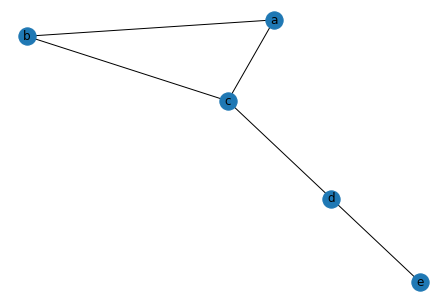

In [17]:
mapping = {0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e'}
H = nx.relabel_nodes(G, mapping)
nx.draw(H, with_labels=True)
plt.show()

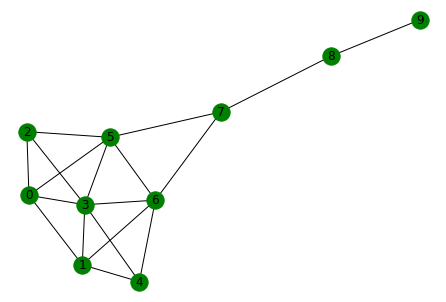

In [18]:
G = nx.krackhardt_kite_graph()
nx.draw(G, node_color='green',with_labels=True)
plt.show()

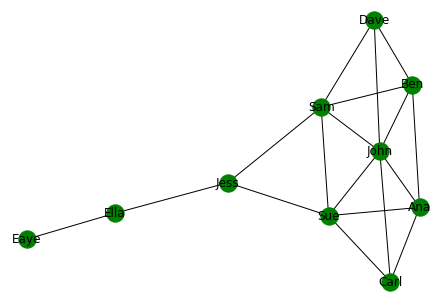

In [19]:
mapping = {0: 'Ben', 1: 'Ana', 2: 'Dave', 3: 'John', 4: 'Carl',5:'Sam',6:'Sue',7:'Jess',8:'Ella',9:'Eaye'}
H = nx.relabel_nodes(G, mapping)
nx.draw(H, node_color='green',with_labels=True)
plt.show()

In [20]:
print("Betweenness")
b = nx.betweenness_centrality(H)
for v in H.nodes():
    print("%s: %5.3f" % (v, b[v]))

Betweenness
Ben: 0.023
Ana: 0.023
Dave: 0.000
John: 0.102
Carl: 0.000
Sam: 0.231
Sue: 0.231
Jess: 0.389
Ella: 0.222
Eaye: 0.000


In [21]:
print("Degree centrality")
d = nx.degree_centrality(H)
for v in H.nodes():
    print("%s: %5.3f" % (v, d[v]))

Degree centrality
Ben: 0.444
Ana: 0.444
Dave: 0.333
John: 0.667
Carl: 0.333
Sam: 0.556
Sue: 0.556
Jess: 0.333
Ella: 0.222
Eaye: 0.111


In [22]:
print("Closeness centrality")
c = nx.closeness_centrality(H)
for v in H.nodes():
    print("%s: %5.3f" % (v, c[v]))

Closeness centrality
Ben: 0.529
Ana: 0.529
Dave: 0.500
John: 0.600
Carl: 0.500
Sam: 0.643
Sue: 0.643
Jess: 0.600
Ella: 0.429
Eaye: 0.310


In [23]:
print("Eigenvector centrality")
centrality = nx.eigenvector_centrality(H)
sorted((v, '{:0.2f}'.format(c)) for v, c in centrality.items())

Eigenvector centrality


[('Ana', '0.35'),
 ('Ben', '0.35'),
 ('Carl', '0.29'),
 ('Dave', '0.29'),
 ('Eaye', '0.01'),
 ('Ella', '0.05'),
 ('Jess', '0.20'),
 ('John', '0.48'),
 ('Sam', '0.40'),
 ('Sue', '0.40')]